## Importing all the required models

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()


## Load Dataset

In [2]:
data=pd.read_csv('D:/Data/Medical costs.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Checking for missing values

In [3]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Getting dummy variables

In [4]:
data = pd.get_dummies(data, drop_first=True)

In [5]:
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


## Lets check if there is multicollinearity

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data[['age','bmi','children']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [7]:
vif 

,VIF,features
0,7.536550,age
1,7.846515,bmi
2,1.796637,children


## Define Dependent and independent Variable

In [8]:
y = data['charges']
x = data.drop(['charges'], axis=1)

## Standardize the data

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
x_scaled = scaler.transform(x)

## Spliting the Data into Training data and Testing data

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=21)

## Training the Model

In [12]:
from sklearn.ensemble import RandomForestRegressor 
reg = RandomForestRegressor(n_estimators = 100, random_state = 0) 
reg.fit(x_train,y_train)
y_hat = reg.predict(x_train)


In [13]:
reg.score(x_train,y_train)

0.9763257014265395

## Prediction With Test Data

In [14]:
y_hat = reg.predict(x_test)

C:\Users\Nolan Pereira\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


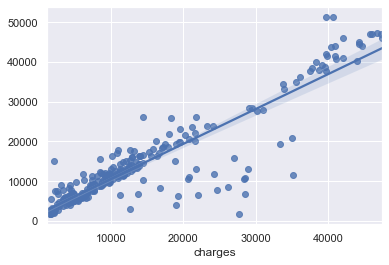

In [15]:
sns.regplot(y_test,y_hat)

In [16]:
df_pf = pd.DataFrame((y_hat),columns=['Prediction'])
df_pf.head()

,Prediction
0,5196.031969
1,5201.588824
2,16337.344452
3,20670.655209
4,10208.969549


In [17]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0     5266.36560
1     5472.44900
2    10197.77220
3    20773.62775
4     7348.14200
Name: charges, dtype: float64

In [18]:
df_pf['Target'] =(y_test)
df_pf.head()

,Prediction,Target
0,5196.031969,5266.36560
1,5201.588824,5472.44900
2,16337.344452,10197.77220
3,20670.655209,20773.62775
4,10208.969549,7348.14200


## Testing the Accuracy of the Model

In [19]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [20]:
df_pf.describe()

,Prediction,Target,Residual
count,268.000000,268.000000,268.000000
mean,14202.259195,14108.653630,-93.605566
std,11422.493014,11804.783383,4981.511366
min,1629.009071,1261.442000,-12841.340995
25%,6705.142619,5638.185125,-1937.690932
50%,11220.320456,10463.795500,-638.425704
75%,16316.360565,17965.071475,-7.661175
max,51410.424471,47462.894000,25930.202930


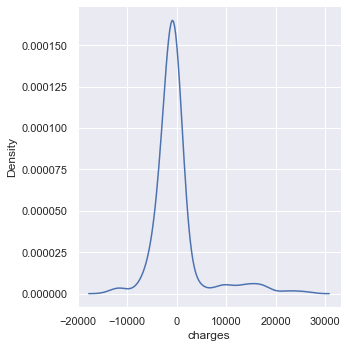

In [21]:
Residual=y_test-y_hat
sns.displot(Residual,kind="kde")

In [22]:
mae = metrics.mean_absolute_error(y_test, y_hat)
mse = metrics.mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_test, y_hat)
Adj_R2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)


print("Mean Absolute Error = ",mae)
print("Mean Squared Error = ", mse)
print("Root Mean Squared Error = ", rmse)
print("R-Squared = ", r2)
print("Adjusted R-Squared = ", Adj_R2)

Mean Absolute Error =  2674.8188296560693
Mean Squared Error =  24731622.510144215
Root Mean Squared Error =  4973.089835318101
R-Squared =  0.8218605540240862
Adjusted R-Squared =  0.8163581773144055


## Predicting New Data 

In [23]:
x.head(1)

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,0,1,0,0,1


In [24]:
reg.predict(x.head(1))

array([58642.6475475])

## Pickling The Model file For Deployment

In [25]:
import pickle

In [27]:
pickle.dump(reg,open('regmodel.pkl','wb'))

In [28]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

## Predicting Data in Pickled File

In [29]:
pickled_model.predict(x.head(1))

array([58642.6475475])